**Lab 3** for the course of *Selected Topics in Music and Acoustic Engineering* :

***Machine Learning for Audio and Acoustic Engineering***
---

# **Before you start**

*   Go to "*File*" --> "*Save a copy in Drive*"
*   Open that copy (might open automatically)
*   Then continue below

# **Lab 3: Neural Networks**

In this lab we will start to work with deep learning models. We will begin by looking at simple examples with synthetically generated data. Then, you will move to a more challenging and realistic problem.


### **Exercise 1**: Approximating Synthetic Data

Execute the following lines for create a synthetically generated dataset:

In [ ]:
#!conda install tensorflow -y

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import librosa
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.style.use("seaborn-v0_8")



Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Carmen\miniconda3\envs\CMRM2024

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           3 KB
    abseil-cpp-20211102.0      |       hd77b12b_0         1.7 MB
    absl-py-2.1.0              |   py38haa95532_0         191 KB
    aiohappyeyeballs-2.4.0     |   py38haa95532_0          20 KB
    aiohttp-3.10.5             |   py38h827c3e9_0         699 KB
    aiosignal-1.2.0            |     pyhd3eb1b0_0          12 KB
    astunparse-1.6.3           |             py_0          17 KB
    async-timeout-4.0.3        |   py38haa95532_0          13 KB
    blinker-1.6.2              |   py38haa95532_0          29 KB
    c-a

C:\Users\Carmen\miniconda3\Lib\site-packages\conda\base\context.py:982: FutureWarning: Adding 'defaults' to the channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly via 'conda config --add channels <name>', e.g. 'conda config --add channels defaults'.
  deprecated.topic(


In [3]:
def gen_data(size, a, b):
  x = np.random.rand(size,1)-0.5
  y = a*x + b
  y = y*(x>0)
  y = y + 0.2*(np.random.randn(*x.shape))
  return x, y

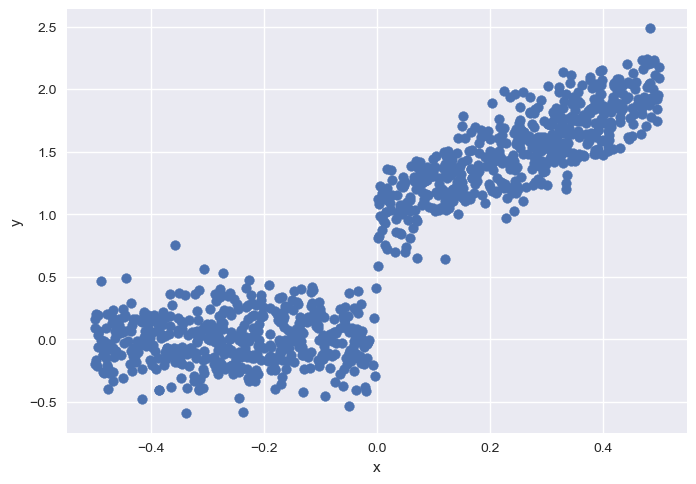

In [4]:
# Create data and plot
Xdata, Ydata = gen_data(1000, 2, 1)
plt.scatter(Xdata,Ydata);
plt.xlabel('x');
plt.ylabel('y');

Describe the function underlying the model used to generate the data. Complete the symbols "?"

\begin{equation}
  y(x)=\begin{cases}
    2x + 1 + 0.2 \cdot  \mathcal{N}(0, 1) & \text{if } x > 0 \text{ , where } x = \mathcal{U}(0, 1) - 0.5 \\
    0.2 \cdot  \mathcal{N}(0, 1), & \text{otherwise}.
  \end{cases}
\end{equation}


### **Exercise 2**: Create a MLP neural network model using Keras

Create the following fully-connected feedforward network using Keras' sequential model. Use:

| Layer | Type  | Units | Activation | Description                                                  |
|-------|-------|-------|------------|--------------------------------------------------------------|
| 1     | Dense | 5     | ReLU       | First hidden layer with 5 neurons, applies non-linearity     |
| 2     | Dense | 5     | ReLU       | Second hidden layer, also with 5 neurons                     |
| 3     | Dense | 1     | Linear     | Output layer, returns a single continuous value (regression) |

Show the model's summary.

![](https://drive.google.com/uc?export=view&id=1UJwycQXQG8kkF0N8CmDW-ED-hY-Uck5o)



In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential([
    # First hidden layer with 5 neurons and ReLU activation
    Dense(5, activation='relu', input_shape=(1,)),
    
    # Second hidden layer with 5 neurons and ReLU activation
    Dense(5, activation='relu'),
    
    # Output layer with 1 neuron and linear activation (for regression)
    Dense(1, activation='linear')
])

# Show the model's summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


How many parameters has the model?  (Hint: use the function model.summary())

In [6]:


# Print total number of parameters
model.count_params()

46

Compile the model and train it on Xdata using MSE as the loss function and SGD optimizer with learning rate 0.01. Train the model until reaching 300 epochs.

In [7]:
# model.compile(....)
# history = model.fit(Xdata, Ydata, epochs=...)

from tensorflow.keras.optimizers import SGD

# Compile the model using Mean Squared Error loss and SGD optimizer
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='mse'
)

# Train the model on Xdata and Ydata for 300 epochs
history = model.fit(Xdata, Ydata, epochs=300)


Epoch 1/300
32/32 [==============================] - 1s 2ms/step - loss: 0.9496
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 0.5893
Epoch 3/300
32/32 [==============================] - 0s 5ms/step - loss: 0.4214
Epoch 4/300
32/32 [==============================] - 0s 5ms/step - loss: 0.3144
Epoch 5/300
32/32 [==============================] - 0s 3ms/step - loss: 0.2372
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1814
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1425
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1181
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1041
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0955
Epoch 11/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0904
Epoch 12/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0868
Epoch 13/300
32/32 [=================

Plot the training history of the network, showing the evolution of the training loss.

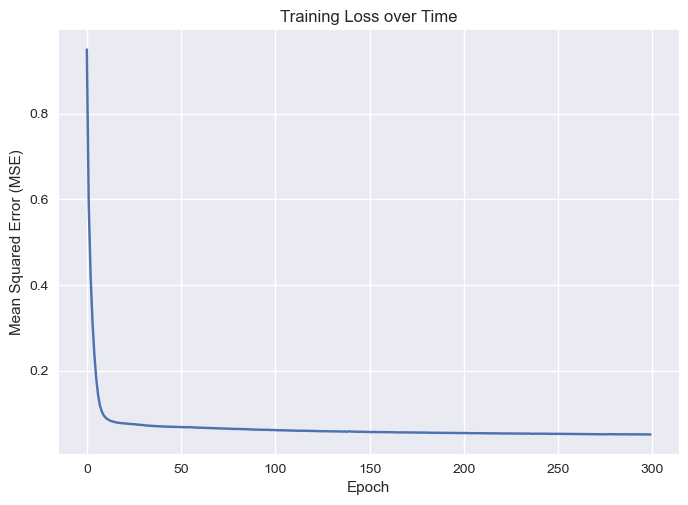

In [8]:
# Plot the training loss over epochs
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Loss over Time')
plt.grid(True)
plt.show()

Which is the minimum loss achieved by the model? At which epoch achieved that loss value?

In [9]:
# ...
# Find the minimum loss and its corresponding epoch
min_loss = min(history.history['loss'])
min_loss_index = [i for i, l in enumerate(history.history['loss']) if l == min_loss]

# Print the result 

print('Minumum Loss on the Training Set: ', min_loss , ' obtained at epoch: ', ''.join(map(str, [min_loss_index[0]])) )



Minumum Loss on the Training Set:  0.05131381005048752  obtained at epoch:  299


Plot the true training data together with the approximated data using the predictions.

32/32 [==============================] - 0s 1ms/step


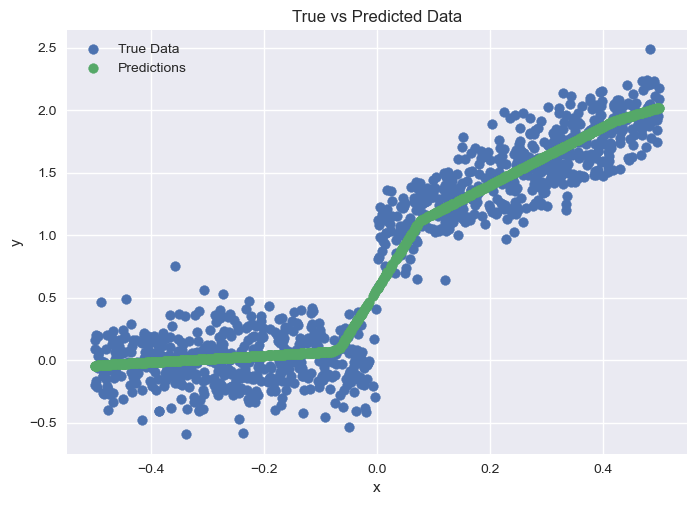

In [10]:
# ...

# Make predictions using the trained model
preds = model.predict(Xdata)

# Plot true training data
plt.scatter(Xdata, Ydata, label='True Data')

# Plot predicted data
plt.scatter(Xdata, preds, label='Predictions')

# Add legend and labels
plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs Predicted Data')
plt.legend()
plt.grid(True)
plt.show()


Now initialize the model again and fit it, but train it for 1000 epochs.

In [11]:
# Define the Fully-connected MLP
# ....

# Compiling the model
# ...

# Training the model
# history_1000 = model.fit(Xdata, Ydata, epochs=...)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Define the Fully-connected MLP
model_1000 = Sequential([
    Dense(5, activation='relu', input_shape=(1,)),
    Dense(5, activation='relu'),
    Dense(1, activation='linear')
])

# Compiling the model
opt = SGD(learning_rate=0.01)
model_1000.compile(optimizer=opt, loss='mse')

# Training the model
history_1000 = model_1000.fit(Xdata, Ydata, epochs=1000)


Epoch 1/1000
32/32 [==============================] - 1s 2ms/step - loss: 1.0238
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.7530
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6600
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6116
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5717
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5287
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4824
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4335
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.3832
Epoch 10/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.3347
Epoch 11/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.2881
Epoch 12/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.2460
Epoch 13/1000
32/32 [====

Plot the original data and the predicted data. What are the differences observed with respect to the case before?

32/32 [==============================] - 0s 2ms/step


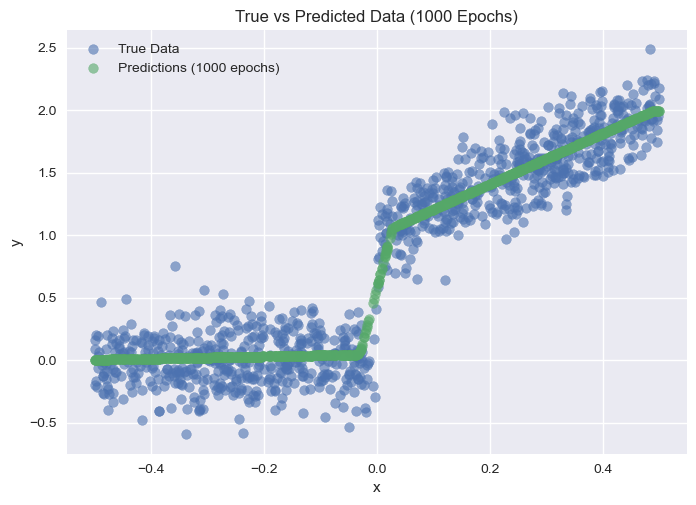

32/32 [==============================] - 0s 4ms/step


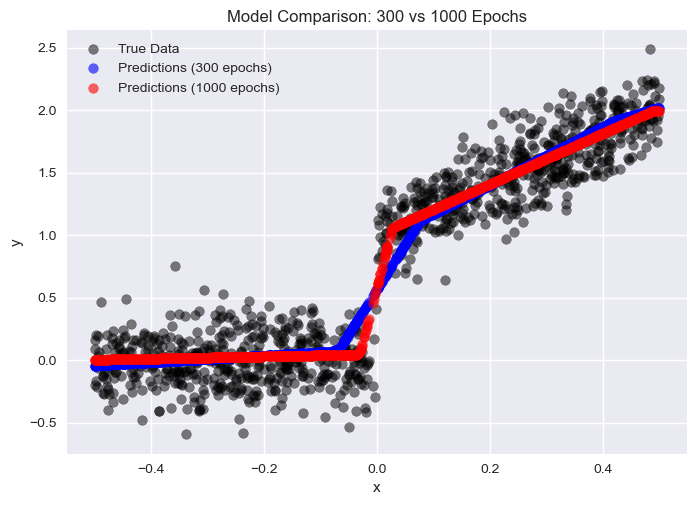

In [12]:
# Predict using the model trained for 1000 epochs
preds_1000 = model_1000.predict(Xdata)

# Plot original data
plt.scatter(Xdata, Ydata, label='True Data', alpha=0.6)

# Plot predicted data
plt.scatter(Xdata, preds_1000, label='Predictions (1000 epochs)', alpha=0.6)

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs Predicted Data (1000 Epochs)')
plt.legend()
plt.grid(True)
plt.show()


# Predict using both models
preds_300 = model.predict(Xdata)        # model trained for 300 epochs
preds_1000 = model_1000.predict(Xdata)  # model trained for 1000 epochs

# Plot the true data
plt.scatter(Xdata, Ydata, label='True Data', alpha=0.5, color='black')

# Plot predictions from 300 epochs model
plt.scatter(Xdata, preds_300, label='Predictions (300 epochs)', alpha=0.6, color='blue')

# Plot predictions from 1000 epochs model
plt.scatter(Xdata, preds_1000, label='Predictions (1000 epochs)', alpha=0.6, color='red')

# Labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Comparison: 300 vs 1000 Epochs')
plt.legend()
plt.grid(True)
plt.show()



What is the best loss achieved in this case?

In [13]:
# Find the best loss and its epoch for the 1000-epoch model
min_loss_1000 = min(history_1000.history['loss'])
min_loss_index_1000 = [i for i, l in enumerate(history_1000.history['loss']) if l == min_loss_1000]

# Print the result
print('Minimum Loss on the Training Set (1000 epochs):', min_loss_1000, 'obtained at epoch:', min_loss_index_1000[0])


Minimum Loss on the Training Set (1000 epochs): 0.042836643755435944 obtained at epoch: 995


### **Exercise 3**: Classification

Generate synthetically two bivariate Gaussian vectors (see np.random.multivariate_normal), each one with 1000 samples:

*   Xdata0, with mean [-1,-1] and covariance [[4,0],[0,4]]
*   Xdata1, with mean [1,1] and covariance [[3,0],[0,3]]





In [14]:

# Bivariate Gaussian
mean0 = [-1, -1]
cov0 = [[4, 0], [0, 4]]   # diagonal covariance matrix

mean1 = [1, 1]
cov1 = [[3, 0], [0, 3]]

# Generate 1000 samples from each distribution
Xdata0 = np.random.multivariate_normal(mean0, cov0, 1000)
Xdata1 = np.random.multivariate_normal(mean1, cov1, 1000)

# Print shape to verify
print(Xdata0.shape, Xdata1.shape)

(1000, 2) (1000, 2)


Expected output:
```
(1000, 2) (1000, 2)
```

From the above Gaussian vectors, stack them to generate a feature data matrix Xdatac with shape (2000,2) and the corresponding label vector Ydatac with zeros and ones of shape (2000,)

In [15]:
#Features
# Features
Xdatac = np.vstack((Xdata0, Xdata1))  # Stack vertically: shape (2000, 2)

# Labels
labels0 = np.zeros(Xdata0.shape[0])   # Class 0 (1000 samples)
labels1 = np.ones(Xdata1.shape[0])    # Class 1 (1000 samples)
labels_gt = np.concatenate((labels0, labels1), axis=0)  # Shape (2000,)

# Check dimensions
print(Xdatac.shape, labels_gt.shape)


(2000, 2) (2000,)


Expected output:
```
(2000, 2) (2000, 2)
```

Create a scatterplot of the two classes:

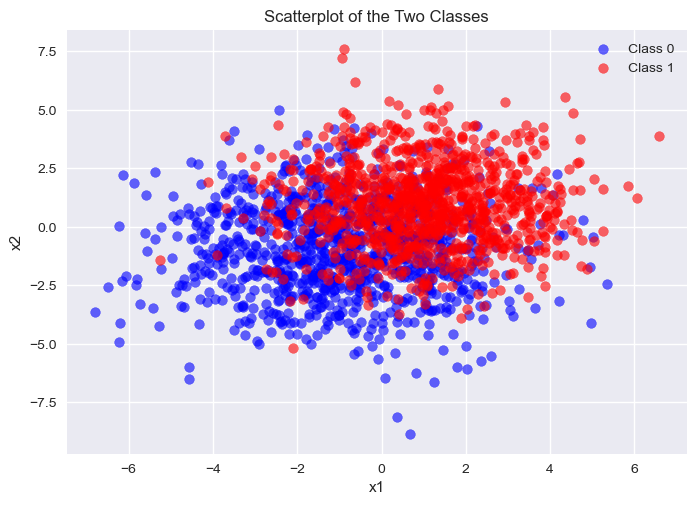

In [16]:
# Class 0
plt.scatter(Xdatac[labels_gt == 0, 0], Xdatac[labels_gt == 0, 1], 
            label='Class 0', alpha=0.6, c='blue')

# Class 1
plt.scatter(Xdatac[labels_gt == 1, 0], Xdatac[labels_gt == 1, 1], 
            label='Class 1', alpha=0.6, c='red')

# Aesthetics
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatterplot of the Two Classes')
plt.legend()
plt.grid(True)
plt.show()

Divide the data Xdatac into a training partition and validation partition using "train_test_split" from sklearn. Use 30% of your data for validation.

In [17]:
from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(....)



# Split: 70% training, 30% validation
X_train, X_valid, y_train, y_valid = train_test_split(
    Xdatac, labels_gt, test_size=0.3, random_state=42
)




#  verify shapes
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)



(1400, 2) (600, 2) (1400,) (600,)


Create a model identical to the one of Exercise 2 but use sigmoid activation in the output layer. You need also now to specify that the input has two values.

Train the model on the training partion. Select as loss function "binary_crossentropy" and monitor the training accuracy using metrics=["accuracy"]. Use also the validation partition to track the validation accuracy at each epoch.

In [18]:
# Define the Fully-connected MLP

# ...

# Compiling the model
# ...

# Training the model
# history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=300)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


# Define the Fully-connected MLP for classification
model = Sequential([
    Dense(5, activation='relu', input_shape=(2,)),   # input shape is now (2,)
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')                   # sigmoid for binary classification
])

# Compile the model
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=300
)

Epoch 1/300
44/44 [==============================] - 1s 11ms/step - loss: 0.6016 - accuracy: 0.7314 - val_loss: 0.5634 - val_accuracy: 0.7650
Epoch 2/300
44/44 [==============================] - 0s 4ms/step - loss: 0.5649 - accuracy: 0.7479 - val_loss: 0.5366 - val_accuracy: 0.7733
Epoch 3/300
44/44 [==============================] - 0s 4ms/step - loss: 0.5462 - accuracy: 0.7571 - val_loss: 0.5195 - val_accuracy: 0.7850
Epoch 4/300
44/44 [==============================] - 0s 4ms/step - loss: 0.5340 - accuracy: 0.7643 - val_loss: 0.5079 - val_accuracy: 0.7833
Epoch 5/300
44/44 [==============================] - 0s 4ms/step - loss: 0.5252 - accuracy: 0.7664 - val_loss: 0.4996 - val_accuracy: 0.7850
Epoch 6/300
44/44 [==============================] - 0s 4ms/step - loss: 0.5198 - accuracy: 0.7664 - val_loss: 0.4930 - val_accuracy: 0.7900
Epoch 7/300
44/44 [==============================] - 0s 8ms/step - loss: 0.5154 - accuracy: 0.7657 - val_loss: 0.4881 - val_accuracy: 0.7883
Epoch 8/300


Plot the training history showing the training accuracy and validation accuracy.

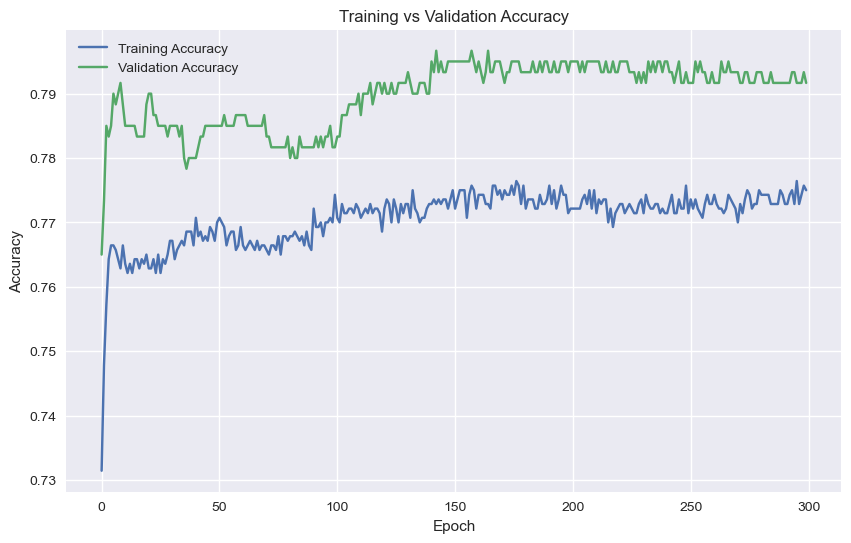

In [19]:
# Plot training  validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Aesthetics
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Predict over the training data and create a scatter plot showing the predicted class for each data example.

44/44 [==============================] - 0s 1ms/step
(1400, 1)


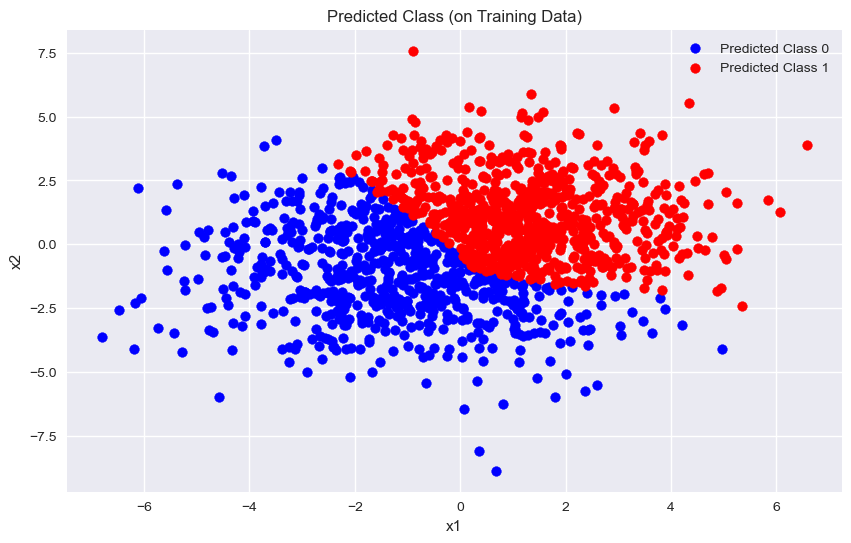

In [20]:
# Predict on training data 
y_pred_probs = model.predict(X_train)
# Print shape of predictions
print(y_pred_probs.shape)  # Should be (1400, 1) 
# Convert probabilities to class labels (0 or 1)
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()

# Scatter plot of predicted classes
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_pred_classes == 0, 0], X_train[y_pred_classes == 0, 1], c='blue', label='Predicted Class 0')
plt.scatter(X_train[y_pred_classes == 1, 0], X_train[y_pred_classes == 1, 1], c='red', label='Predicted Class 1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Predicted Class (on Training Data)')
plt.legend()
plt.grid(True)
plt.show()

Scatter the prediction

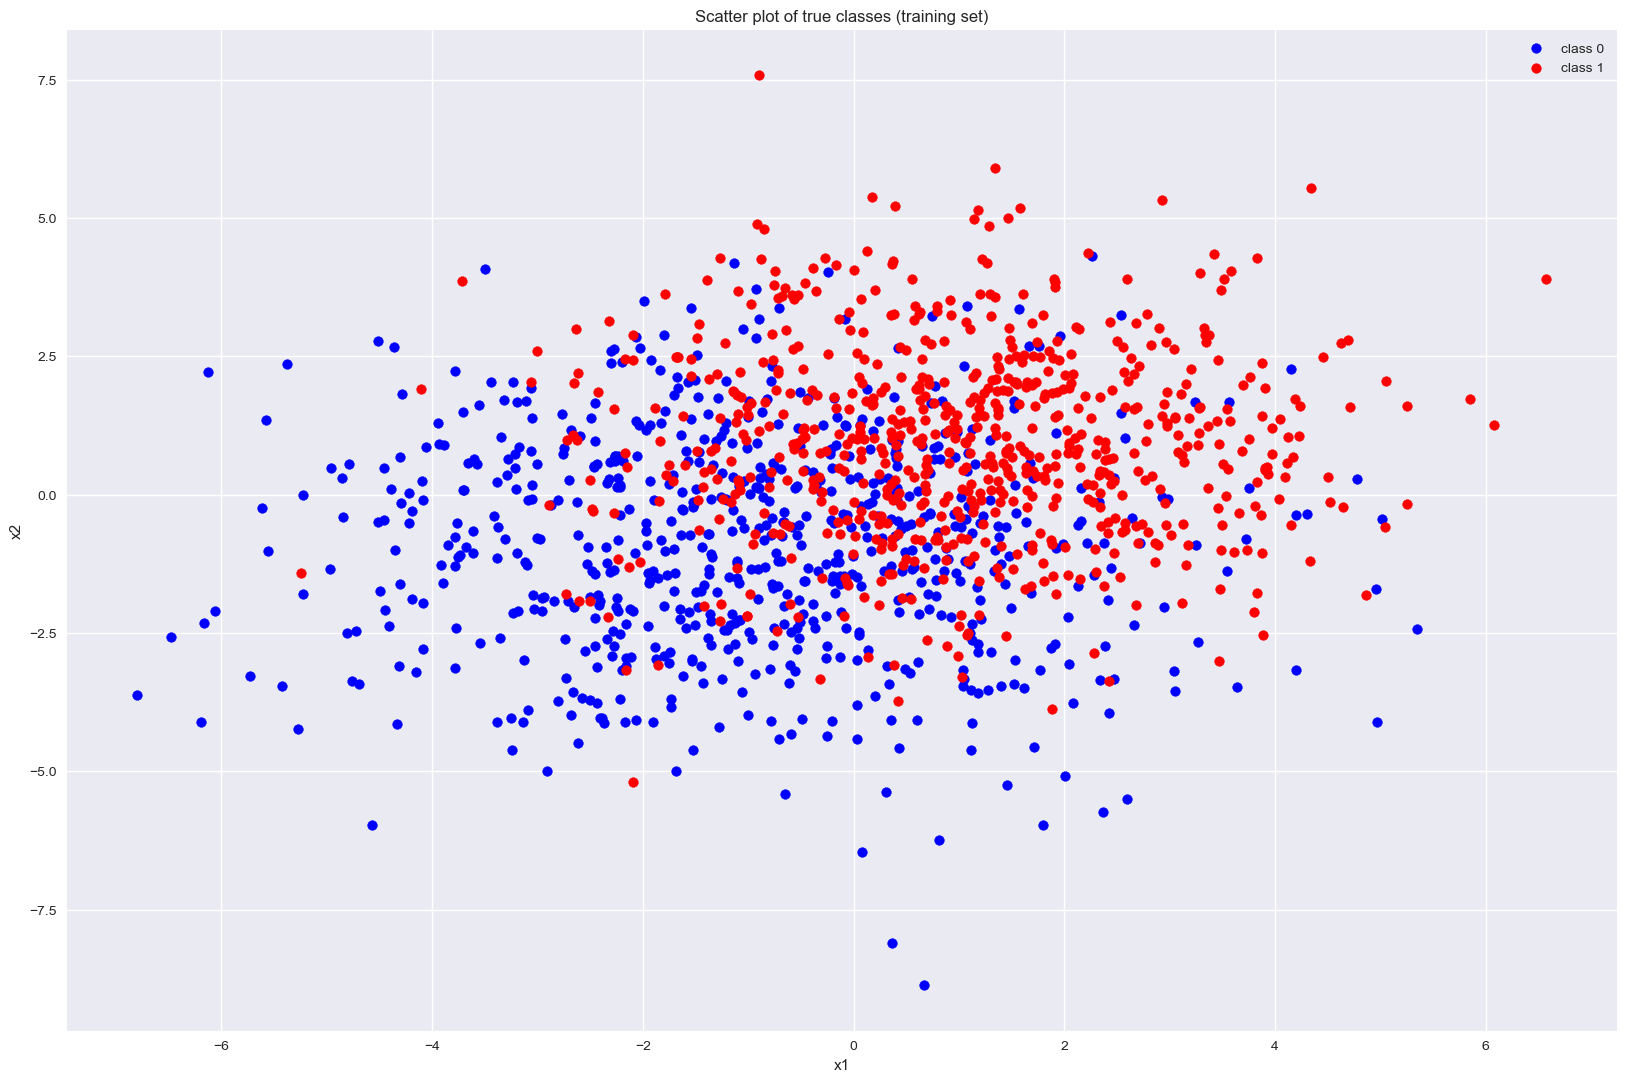

In [21]:

# Scatter plot of true classes (from y_train)
plt.figure(figsize=(20, 13))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='b')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='r')
plt.title('Scatter plot of true classes (training set)')
plt.legend(('class 0', 'class 1'))
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()




### **Exercise 4**: Data Preparation


Follow the same steps in Lab 2 to download the ESC-50 dataset.

In [22]:
# !wget https://github.com/karolpiczak/ESC-50/archive/master.zip
# !unzip master.zip

Create a list of the files corresponding to the 10 first classes. Those files will form our dataset (400 signals).

In [23]:
fn_csv = 'ESC-50-master/meta/esc50.csv'

files = []  # File list
labels = []  # Class list

# ...

print(f'Lengths: esc5_X: {len(files)}, esc5_y: {len(labels)}')


Lengths: esc5_X: 0, esc5_y: 0


Expected output:

``` Lengths: esc5_X: 400, esc5_y: 400 ```

Convert the labels to class indexes (rank 1) - e.g. 0,1,2,....,9

In [24]:
# labels = ...

Create a list storing the signals from all the files:

In [25]:
# signals = ...

For each signal in the list, compute the melspectrogram with librosa using default parameters:

In [26]:
mel_spegrams = []
# ...

Convert the list to a numpy array called Xdata. You should end up with an array of shape (400, 128, 216). What do these numbers mean?

In [27]:
Xdata = np.asarray(mel_spegrams)
Xdata.shape

(0,)

Expected output:

```(400, 128, 216)```

ANSWER THE QUESTION HERE!

### **Exercise 5**: MLP Classification

Let's try now to classify the audio files by using the computed mel spectrogram data. First, flatten each spectrogram into a one-dimensional array, so that you end up with a new array Xdata_f of shape (400, 27648). You can do that by using the function reshape from numpy.

In [28]:
# Xdata_f = ...
# print(Xdata_f.shape)

Expected output:
```
(400, 27648)
```

Let's first use the sklearn StandardScaler function to scale the data (save the output in Xdata_s)

In [29]:
# scaler = ...
# Xdata_s = ...

Create a test and validation split with 20% of the samples. Call the splits X_train, y_train, X_val, y_val.

In [30]:
# X_train, X_val, y_train, y_val = ...

Now, create a MLP-based network for classifying these audios. You can use the same layer structure as in the previous examples, but remember to adapt the output layer so that its size is equal to the number of classes and apply 'softmax' activation. You can also try to increase the number of neurons in the hidden layers.

Proposed architecture:

| Layer | Type  | Units | Activation | Output Shape           | Description                                  |
|-------|-------|-------|------------|-------------------------|----------------------------------------------|
| Input | Input | -     | -          | (None, shape_size)      | Input layer with `shape_size` features       |
| 1     | Dense | 16    | ReLU       | (None, 16)              | First hidden layer with 16 neurons           |
| 2     | Dense | 16    | ReLU       | (None, 16)              | Second hidden layer with 16 neurons          |
| 3     | Dense | 10    | Softmax    | (None, 10)              | Output layer for 10-class classification     |

Fit the model using "sparse_categorical_crossentropy" as loss function. Probably your first attempts will overfit.

Try different strategies to prevent overfitting:

*   Dropout
*   Regularization
*   Reduce number of neurons/layers

What is the best accuracy you could get with a fully-based MLP network?


In [31]:
# Compile the model

# Training the model
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300)


Which is the minimum loss achieved by the model? At which epoch achieved that loss value?

Plot the training history of the network, showing the evolution of the training/validation loss.

* REPEAT EXPERIMENTS USING THE AFOREMENTIONED TECHNIQUES TO PREVENT OVERFITTING

### **Exercise 6**: CNN

Create training and validation partitions from Xdata. Remember that Xdata stores has size (400, 128, 216), storing 400 Mel spectrograms of sie (128,216). Name the partitions X_train, X_test, y_train and y_test.

In [32]:
# X_train, X_test, y_train, y_test = train_test_split(..., test_size=0.2)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Scale each spectrogram by substracting its mean and dividing by its standard deviation.

In [33]:
scaler = sklearn.preprocessing.StandardScaler()
X_train_s = []
X_test_s = []

# ...

X_train_s = np.asarray(X_train_s)
X_test_s = np.asarray(X_test_s)

Create a convolutional neural network model. Remember to adapt the input shape of the first layer to the new input. 

You can start with a model like the next one. Remember to include regularization strategies like dropout layers.

| Layer | Type        | Filters/Units | Kernel/Pool Size | Activation | Output Shape        | Description                                  |
|-------|-------------|----------------|------------------|------------|---------------------|----------------------------------------------|
| Input | Input        | -              | -                | -          | (None, H, W, C)      | Input shape from `X_train_sx.shape[1:]`      |
| 1     | Conv2D       | 16             | (3, 3)           | ReLU       | (None, H-2, W-2, 16) | First convolutional layer                    |
| 2     | MaxPooling2D | -              | (3, 3), stride 3 | -          | (None, H//3, W//3, 16) | Downsamples feature maps                     |
| 3     | Conv2D       | 16             | (3, 3)           | ReLU       | (None, ..., ..., 16) | Second convolutional layer                   |
| 4     | MaxPooling2D | -              | (2, 2), stride 2 | -          | (None, ..., ..., 16) | Second pooling layer                         |
| 5     | Conv2D       | 32             | (2, 2)           | ReLU       | (None, ..., ..., 32) | Third convolutional layer                    |
| 6     | Flatten      | -              | -                | -          | (None, N)            | Flattens 2D features to 1D vector            |
| 7     | Dense        | 32             | -                | ReLU       | (None, 32)           | Fully connected hidden layer                 |
| 8     | Dropout      | -              | -                | -          | (None, 32)           | Dropout for regularization (rate=0.1)        |
| 9     | Dense        | 10             | -                | Softmax    | (None, 10)           | Output layer for 10-class classification     |

In [34]:
# expanding X_train_s and X_test_s to fit conv2d
# ...

Fit the model and try to improve the results obtained with the MLP model.

In [35]:
#compile the model
# ...

#fit the model
# history = model.fit(X_train_sx, y_train, validation_data=(X_test_sx, y_test), batch_size=32, epochs=100)

Plot the training history (train/val loss/accuracy)

Which is the minimum loss achieved by the model? At which epoch achieved that loss value?

In [36]:
# ...

# print('Minimum Loss on the Validation Set: ', min_val_loss ,' obtained at epoch: ' , ''.join(map(str, min_val_loss_index[0])), '  with an Accuracy of: ', val_accuracy_history[int(min_val_loss_index[0].item())] )

Tune your model and try to achieve an accuracy above 60%.